In [1]:
%%HTML
<script> function code_hide() { $('div.input').hide(); } 
$( document ).ready(code_hide);</script><style>
.documenttitel {text-align: Center !important;  font-size : 30pt !important;  font-weight: bold !important;line-height : 400%;}
.auteur {text-align: Center !important; line-height : 200%; font-size : 14pt !important; }
body { counter-reset: figuresjup tablejup !important;}
figcaption::before {counter-increment: figuresjup !important;
content: 'Fig. ' counter(figuresjup) ': '  !important;
font-weight: bold;}
figcaption { font-style: oblique;}
caption { font-style: oblique;}
caption::before {counter-increment: tablejup !important;
content: 'Table ' counter(tablejup) ': '  !important;
font-weight: bold;}
</style>

<p  class='documenttitel'> Filters </p>
<p  class='auteur'> Jan Genoe (jan.genoe@kuleuven.be)</p>

In [1]:
# initialisatie voor alle cellen
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from  matplotlib import patches
import scipy.signal as signal
import pandas as pd
# %matplotlib inline
# import pip
# try:
#    __import__("SchemDraw")
# except ImportError:
#    pip.main(['install', "SchemDraw"])    
import numpy as np
import SchemDraw as schem
import SchemDraw.elements as e
from ipywidgets import interact,FloatSlider
usewidgets=False;

def freqs_resp(ba_array,Dmin=1,Dmax=5,lowDB=-100, Npts = 1024,fsize=(6,4),legend=[],Printcoef=True,SaveGraf=False,grafname="c2.svg"):
    """
        b = ndarray of numerator coefficients
        a = ndarray of denominator coefficents
     Dmin = start frequency as 10**Dmin
     Dmax = stop frequency as 10**Dmax
    lowDB = lowest transfer function amplitude (in DB)
     Npts = number of points to plot; defult is 1024
    fsize = figure size; defult is (6,4) inches
    """
    f = np.logspace(Dmin,Dmax,Npts)
    fig, ax = plt.subplots(2,1 ,sharex=True,figsize=fsize)
    index=0
    for ba in ba_array:
        if Printcoef:
            ib=len(ba[0])-1
            print("Veelterm coefficienten teller: M=",ib)
            for bb in ba[0]:
                print ("b[",ib,"] =",bb)
                ib-=1
            ia=len(ba[1])-1
            print("Veelterm coefficienten noemer: N=", ia)
            for aa in ba[1]:
                print ("a[",ia,"] =",aa)
                ia-=1
        w,H = signal.freqs(ba[0],ba[1],2*np.pi*f)
        if legend==[]:
            ax[0].semilogx(f,20*np.log10(np.abs(H)))
        else:
            ax[0].semilogx(f,20*np.log10(np.abs(H)),label=legend[index])
            index+=1
        ax[1].semilogx(f,np.angle(H)/np.pi*180)
    ax[0].set_ylabel('Gain (dB)')
    ax[0].set_title('Frequency Response - Magnitude')
    ax[0].grid()
    ax[0].set_xlim([10**Dmin,10**Dmax]);
    ax[0].set_ylim([lowDB,5]);
    if not(legend==[]):
        ax[0].legend()
    ax[1].set_xlabel('Frequency (Hz)')
    ax[1].set_ylabel('Phase (graden)')
    ax[1].set_title('Frequency Response - Phase')
    ax[1].set_xlim([10**Dmin,10**Dmax]);
    ax[1].set_yticks([-180,-90,0,90,180])
    ax[1].grid();
    if SaveGraf:
        plt.savefig(grafname)
    plt.show();
def polen_nullen(z,p,circelarray,fsize=(6,6),Printcoef=True):
    if Printcoef:
        ib=1
        print("Lijst der nullen: M=", len(z))
        for bb in z:
            print ("z[",ib,"] =",bb)
            ib+=1
        ia=1
        print("Lijst der polen: N=", len(p))
        for aa in p:
            print ("p[",ia,"] =",aa)
            ia+=1
    fig, ax = plt.subplots(1,1, figsize=fsize)
    for circel in circelarray:
        ax.add_patch(patches.Ellipse((0,2*np.pi*circel[2]), width=4*np.pi*circel[0], height=4*np.pi*circel[1], fill=False, color='black', ls='dashed'))
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=5.0, markeredgewidth=1.5, markeredgecolor='k', markerfacecolor='g')
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=5.0, markeredgewidth=1.5, markeredgecolor='r', markerfacecolor='r')
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.show();

# Butterworth filters



##  Butterworth laagdoorlaatfilter van de 3de orde

We ontwerpen een analoge 3de orde laagdoorlaatfilter van het type Butterworth met afsnijfrequentie 1 MHz. De transferfunktie $H(s)$ of $H(j\omega)$ die we bekomen is:

\begin{equation}
    H(s) = \frac{\sum_{n=0}^M b_n s^n}{\sum_{n=0}^N a_n s^n}
\end{equation}

$a_n$ en $b_n$ zijn de coeficienten van de veeltermen in de transferfunktie. In dit geval zijn deze:

Veelterm coefficienten teller: M= 0
b[ 0 ] = 2.4805021344239852e+20
Veelterm coefficienten noemer: N= 3
a[ 3 ] = 1.0
a[ 2 ] = 12566370.614359174
a[ 1 ] = 78956835208714.88
a[ 0 ] = 2.4805021344239852e+20


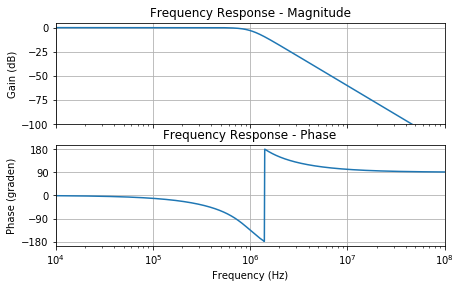

In [2]:
b3,a3 = signal.butter(3,2*np.pi*1e6,analog=True)
freqs_resp([[b3,a3]],4,8);

<figcaption>Amplitude en fase van een derde orde Butterworth laagdoorlaatfilter met afsnijfrequentie 1 MHz</figcaption>

We kunnen ook schrijven als funtie van polen en nulpunten:

\begin{equation}
    H(s) = \frac{\prod_{n=1}^M (s-z_n)}{\prod_{n=1}^N (s-p_n)}
\end{equation}


waarbij de positie van deze nulpunten en polen de volgende is:

Lijst der nullen: M= 0
Lijst der polen: N= 3
p[ 1 ] = (-3141592.6535897935+5441398.092702653j)
p[ 2 ] = (-6283185.307179586-0j)
p[ 3 ] = (-3141592.6535897935-5441398.092702653j)


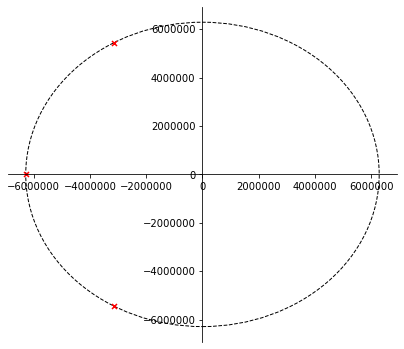

In [4]:
z3,p3,k3 = signal.butter(3,2*np.pi*1e6,analog=True,output='zpk')
polen_nullen(z3,p3,[[1e6,1e6,0]]);

<figcaption>Polen van een derde orde Butterworth laagdoorlaatfilter met afsnijfrequentie 1 MHz</figcaption>

We kunnen deze transferfunktie nu verder uitwerken in een product van meerdere transferfucties waarbij we de complex toegevoegde polen samennemen.

\begin{equation}
    H(s) = H_1(s) H_2(s)= \frac{1}{(s-p_1)(s-p_3)}\frac{1}{(s-p_2)}
\end{equation}

\begin{equation}
     H_1(s)= \frac{1}{(s-p_1)(s-p_3)}
\end{equation}

\begin{equation}
     H_2(s)= \frac{1}{(s-p_2)}
\end{equation}




In [3]:
h1s=[[p3[0]*p3[2]],[1,-(p3[0]+p3[2]),p3[0]*p3[2]]]
h2s=[[p3[1]],[1,-p3[1]]]
freqs_resp([[b3,a3],h1s,h2s],4,8,legend=["H","H1: 2de orde filter","H2: 1ste orde filter"],Printcoef=False);

NameError: name 'p3' is not defined

<figcaption>Opsplitsing van een derde orde Butterworth laagdoorlaatfilter met afsnijfrequentie 1 MHz in 2 transferfunkties H1 en H2</figcaption>

De onderstaande figuur bekijkt deze opsplitsing in detail rond de afsnijfrequentie. Hier merken we dat de overshoot in de 2de orde filter H1(s) voor een deel het sneller dalen van de eerste orde filter H2(s) compenseert

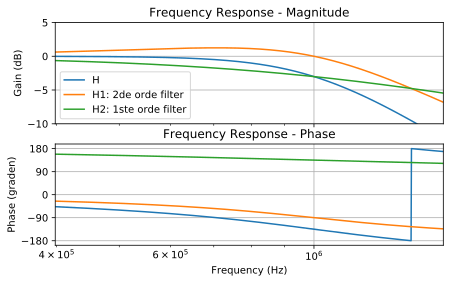

In [9]:
freqs_resp([[b3,a3],h1s,h2s],5.6,6.2,lowDB=-10,legend=["H","H1: 2de orde filter","H2: 1ste orde filter"],Printcoef=False)

<figcaption>Detail rond de afsnijfrequentie van de opsplitsing van een derde orde Butterworth laagdoorlaatfilter met afsnijfrequentie 1 MHz in 2 transferfunkties H1 en H2</figcaption>

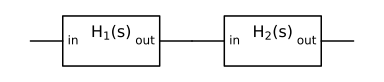

In [99]:
d = schem.Drawing()
left = {'cnt':1,
        'labels':['in'],
        'lblsize':12,
        }
right = {'cnt':1,
         'labels':['out'],
        'lblsize':12,
         }
H1=d.add(e.blackbox(d.unit*1, d.unit*0.6, 
                   linputs=left, rinputs=right,
                   leadlen=1, mainlabel=r'$H_1(s)$'));
H2=d.add(e.blackbox(d.unit*1, d.unit*0.6,
                   linputs=left, rinputs=right,
                   leadlen=1, mainlabel=r'$H_2(s)$'),xy=H1.out+(1,-0.9));
d.draw();

De implementatie van H2 kan er in dit geval als het volgt  uitzien met R1= R2= 9.947 k$\Omega$ en C2 = 16pF

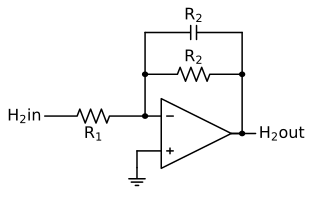

In [17]:
d = schem.Drawing(inches_per_unit=.5)
op = d.add(e.OPAMP)
d.add(e.LINE, d='left', xy=op.in2, l=d.unit/4)
d.add(e.LINE, d='down', l=d.unit/5)
d.add(e.GND)
d.add(e.LINE, d='left', xy=op.in1, l=d.unit/6)
d.add(e.DOT)
d.push()
Rin = d.add(e.RES, d='left', xy=op.in1-[d.unit/5,0], botlabel='$R_1$', lftlabel='$H_2 in$')
d.pop()
d.add(e.LINE, d='up', l=d.unit/2)
d.add(e.DOT)
Rf = d.add(e.RES,  d='right', l=d.unit*1, label='$R_2$')
d.add(e.DOT)
d.add(e.LINE, d='up',xy=Rf.start, l=d.unit/2)
Cout= d.add(e.CAP,  d='right', l=d.unit*1, label='$R_2$')
d.add(e.LINE, d='down', toy=op.out)
d.add(e.DOT)
d.add(e.LINE, d='left', tox=op.out)
d.add(e.LINE, d='right', l=d.unit/4, rgtlabel='$H_2 out$')
d.draw()

Een totale spice file van het gehele circuit ziet er dan als het volgt uit:

##  Butterworth laagdoorlaatfilter van de 5de orde

Veelterm coefficienten teller: M= 0
b[ 0 ] = 9.792629913129003e+33
Veelterm coefficienten noemer: N= 5
a[ 5 ] = 1.0
a[ 4 ] = 20332814.76926104
a[ 3 ] = 206711678220539.9
a[ 2 ] = 1.2988077794177306e+21
a[ 1 ] = 5.043559043399954e+27
a[ 0 ] = 9.792629913129004e+33


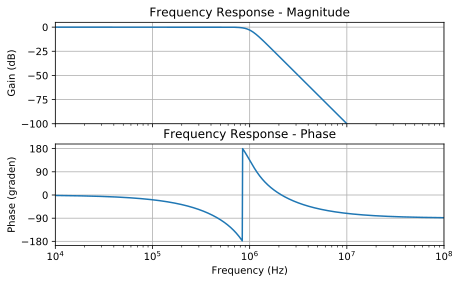

In [5]:
b5,a5 = signal.butter(5,2*np.pi*1e6,analog=True)
freqs_resp([[b5,a5]],4,8);

<figcaption>Amplitude en fase van een vijfde orde Butterworth laagdoorlaatfilter met afsnijfrequentie 1 MHz</figcaption>

Lijst der nullen: M= 0
Lijst der polen: N= 5
p[ 1 ] = (-1941611.0387254667+5975664.329483111j)
p[ 2 ] = (-5083203.69231526+3693163.6609809133j)
p[ 3 ] = (-6283185.307179586-0j)
p[ 4 ] = (-5083203.69231526-3693163.6609809133j)
p[ 5 ] = (-1941611.0387254667-5975664.329483111j)


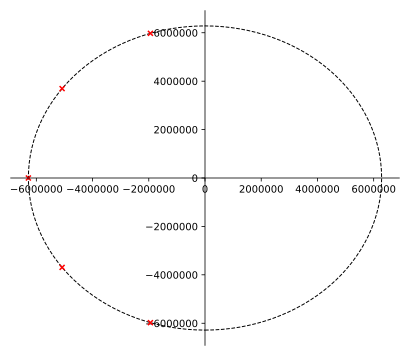

In [13]:
z5,p5,k5 = signal.butter(5,2*np.pi*1e6,analog=True,output='zpk')
polen_nullen(z5,p5,[[1e6,1e6,0]]);

<figcaption>Polen van een vijfde orde Butterworth laagdoorlaatfilter met afsnijfrequentie 1 MHz</figcaption>

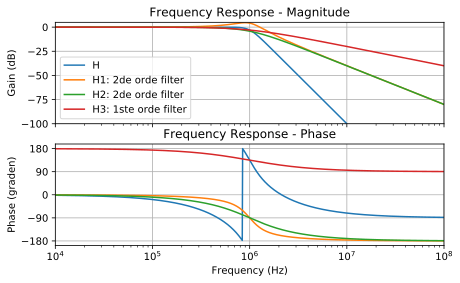

In [14]:
h1s=[[p5[0]*p5[4]],[1,-(p5[0]+p5[4]),p5[0]*p5[4]]]
h2s=[[p5[1]*p5[3]],[1,-(p5[1]+p5[3]),p5[1]*p5[3]]]
h3s=[[p5[2]],[1,-p5[2]]]
freqs_resp([[b5,a5],h1s,h2s,h3s],4,8,legend=["H","H1: 2de orde filter","H2: 2de orde filter","H3: 1ste orde filter"],Printcoef=False);

<figcaption>Opsplitsing van een vijfde orde Butterworth laagdoorlaatfilter met afsnijfrequentie 1 MHz in 3 transferfunkties </figcaption>

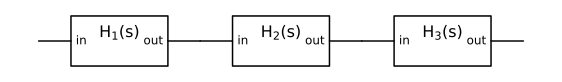

In [100]:
d = schem.Drawing()
left = {'cnt':1,
        'labels':['in'],
        'lblsize':12,
        }
right = {'cnt':1,
         'labels':['out'],
        'lblsize':12,
         }
H1=d.add(e.blackbox(d.unit*1, d.unit*0.6, 
                   linputs=left, rinputs=right,
                   leadlen=1, mainlabel=r'$H_1(s)$'));
H2=d.add(e.blackbox(d.unit*1, d.unit*0.6,
                   linputs=left, rinputs=right,
                   leadlen=1, mainlabel=r'$H_2(s)$'),xy=H1.out+(1,-0.9));
H3=d.add(e.blackbox(d.unit*1, d.unit*0.6,
                   linputs=left, rinputs=right,
                   leadlen=1, mainlabel=r'$H_3(s)$'),xy=H2.out+(1,-0.9));
d.draw();

<figcaption>Hardware implementatie van een vijfde orde Butterworth laagdoorlaatfilter in 3 building blocks</figcaption>

## Vergelijking van de 3de en 5de orde Butterworth laagdoorlaatfilter

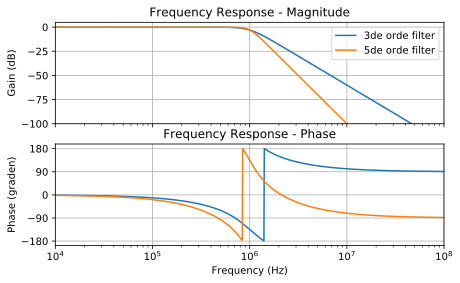

In [7]:
freqs_resp([[b3,a3],[b5,a5]],4,8,legend=["3de orde filter","5de orde filter"],Printcoef=False);

<figcaption>Vergelijking van een derde en vijfde orde Butterworth laagdoorlaatfilter met afsnijfrequentie 1 MHz</figcaption>


## zevende orde banddoorlaatfilter van 10MHz  tot 50MHz

In het eerste voorbeeld van een banddoorlaatfilter bekijken we een redelijk breedbandfilter: De bandbreedte(40 MHz) is in dit geval veel groter dan de laagste doorlaatfrequentie.

Veelterm coefficienten teller: M= 7
b[ 7 ] = 6.334013983218556e+58
b[ 6 ] = 0.0
b[ 5 ] = 0.0
b[ 4 ] = 0.0
b[ 3 ] = 0.0
b[ 2 ] = 0.0
b[ 1 ] = 0.0
b[ 0 ] = 0.0
Veelterm coefficienten noemer: N= 14
a[ 14 ] = 1.0
a[ 13 ] = 1129455138.528784
a[ 12 ] = 7.760089165897884e+17
a[ 11 ] = 3.654151505077993e+26
a[ 10 ] = 1.293535546920629e+35
a[ 9 ] = 3.5017090931362664e+43
a[ 8 ] = 7.334620231296047e+51
a[ 7 ] = 1.1783749530590898e+60
a[ 6 ] = 1.4477960023023706e+68
a[ 5 ] = 1.3643931993116192e+76
a[ 4 ] = 9.948728770520122e+83
a[ 3 ] = 5.547604782936569e+91
a[ 2 ] = 2.325495035605259e+99
a[ 1 ] = 6.681091689314365e+106
a[ 0 ] = 1.1676379112645588e+114


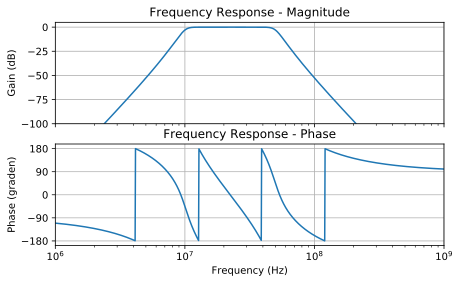

In [15]:
bc,ac = signal.butter(7,2*np.pi*np.array([10.0,50.0])*1e6,btype='bandpass',analog=True)
freqs_resp([[bc,ac]],6,9);

<figcaption>7de orde Butterworth banddoorlaatfilter </figcaption>

Wanneer we de transferfuntie in detail analyseren, vinden we 7 nullen op frequentie 0, en 14 polen, namelijk:

Lijst der nullen: M= 7
z[ 1 ] = 0j
z[ 2 ] = 0j
z[ 3 ] = 0j
z[ 4 ] = 0j
z[ 5 ] = 0j
z[ 6 ] = 0j
z[ 7 ] = 0j
Lijst der polen: N= 14
p[ 1 ] = (-9467553.01746494-62713329.10036281j)
p[ 2 ] = (-30211474.606362037-61659756.49600357j)
p[ 3 ] = (-58777850.02496373-58866599.60061156j)
p[ 4 ] = (-125663706.14359173-62831853.07179589j)
p[ 5 ] = (-58777850.02496373+58866599.60061156j)
p[ 6 ] = (-30211474.606362037+61659756.49600357j)
p[ 7 ] = (-9467553.01746494+62713329.10036281j)
p[ 8 ] = (-46458057.493502825+307739438.435567j)
p[ 9 ] = (-126488603.88224223+258155439.82934594j)
p[ 10 ] = (-167660324.09626448+167913476.98651484j)
p[ 11 ] = (-125663706.14359173+62831853.07179589j)
p[ 12 ] = (-167660324.09626448-167913476.98651484j)
p[ 13 ] = (-126488603.88224223-258155439.82934594j)
p[ 14 ] = (-46458057.493502825-307739438.435567j)


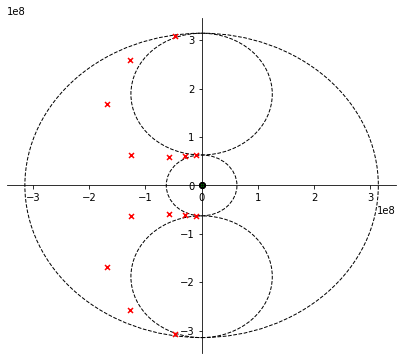

In [5]:
z7,p7,k7 =signal.butter(7,2*np.pi*np.array([10.0,50.0])*1e6,btype='bandpass',analog=True,output='zpk')
polen_nullen(z7,p7,[[10e6,10e6,0],[50e6,50e6,0],[20e6,20e6,30e6],[20e6,20e6,-30e6]]);

<figcaption>polen van een 7de orde Butterworth banddoorlaatfilter </figcaption>

Er is maar een enkele goede methode om van een laagdoorlaatfilter over te  gaan naar een banddoorlaatfilter en dat is via de transformatie die aangegeven is op slide 44. Deze staat ook in je formularium. Het is natuurlijk ook belangrijk een goed gevoel te hebben van waar je verwacht uit te komen. Als je een banddoorlaatfilter hebt met een kleine bandbreedte B in vergelijking met de centrale frequentie fo, gaat dat ook redelijk goed kloppen (zoals in slide 46. Maar als B dezelfde grootteorde krijgt als fo, dan worden de polen meer en meer getrokken in de richting van de 2 afzonderlijke filters na elkaar. Om dat toe te lichten heb ik in de Jupyter een voorbeeldje gegeven van een zevende orde banddoorlaatfilter van 10MHz tot 50MHz. De centrale frequentie is 30MHz maar de bandbreedte B is 40MHz, dus groter dan de centrale frequentie. We zien hier dat de pole niet langer liggen op de 2 halve cirkels waarop we ze verwachten maar dat ze meer en meer getrokken worden in de richting van 2 andere cirkels namelijk de hoogdoorlaat van 10 MHz en de laagdoorlaat van 50 MHz.

Dit is wel een overdreven speciaal geval in de meeste gevallen is de bandbreedte B veel kleiner dan f, en dan lijkt het dat ze mooi op de kleine cirkel liggen. En dat is zeker goed als eerste benadering. Het is niet 100% exact. En dat is ook belangrijk als ingenieur om dat goed te weten.

In [6]:
bl7,al7 = signal.butter(7,2*np.pi*50e6,analog=True);
bh7,ah7 = signal.butter(7,2*np.pi*10e6,btype='highpass',analog=True);
freqs_resp([[bc,ac],[bl7,al7],[bh7,ah7]],5,9,Printcoef=False);

NameError: name 'bc' is not defined

<figcaption>Vergelijking tussen 7de orde Butterworth banddoorlaatfilter en een opeenvolging van laagdoorlaatfilter en een hoogdoorlaatfilter</figcaption>

##  7de orde banddoorlaatfilter tussen 47 en 53 MHz

Veelterm coefficienten teller: M= 7
b[ 7 ] = 1.082225670413975e+53
b[ 6 ] = 0.0
b[ 5 ] = 0.0
b[ 4 ] = 0.0
b[ 3 ] = 0.0
b[ 2 ] = 0.0
b[ 1 ] = 0.0
b[ 0 ] = 0.0
Veelterm coefficienten noemer: N= 14
a[ 14 ] = 1.0
a[ 13 ] = 169418270.77931747
a[ 12 ] = 7.027364430041076e+17
a[ 11 ] = 1.0074611841037228e+26
a[ 10 ] = 2.1017496540749808e+35
a[ 9 ] = 2.488471395316168e+43
a[ 8 ] = 3.4683129207221617e+52
a[ 7 ] = 3.2679992552874596e+60
a[ 6 ] = 3.4107645311434367e+69
a[ 5 ] = 2.406576000783415e+77
a[ 4 ] = 1.998855398085796e+86
a[ 3 ] = 9.422413939327687e+93
a[ 2 ] = 6.463381596708082e+102
a[ 1 ] = 1.5323607880306775e+110
a[ 0 ] = 8.894760315452719e+118


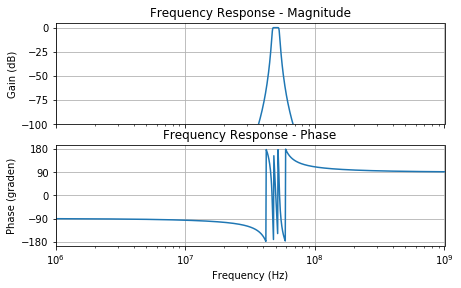

In [7]:
bc2,ac2 = signal.butter(7,2*np.pi*np.array([47.0,53.0])*1e6,btype='bandpass',analog=True)
freqs_resp([[bc2,ac2]],6,9);

<figcaption>Transfer functie van een 7de orde Butterworth banddoorlaatfilter met beperkte bandbreedte</figcaption>

Wanneer we de polen en de nullen plotten, bekomen we het volgende resultaat.

Lijst der nullen: M= 7
z[ 1 ] = 0j
z[ 2 ] = 0j
z[ 3 ] = 0j
z[ 4 ] = 0j
z[ 5 ] = 0j
z[ 6 ] = 0j
z[ 7 ] = 0j
Lijst der polen: N= 14
p[ 1 ] = (-3949021.641305336-295726397.242198j)
p[ 2 ] = (-11200424.836296545-298982612.7578789j)
p[ 3 ] = (-16539450.539423024-305061656.189032j)
p[ 4 ] = (-18849555.92153874-313026248.8897938j)
p[ 5 ] = (-16539450.539423024+305061656.189032j)
p[ 6 ] = (-11200424.836296545+298982612.7578789j)
p[ 7 ] = (-3949021.641305336+295726397.242198j)
p[ 8 ] = (-4439819.935339821+332480313.6424786j)
p[ 9 ] = (-12304586.93699407+328456965.2578802j)
p[ 10 ] = (-17426275.57876118+321418687.7969175j)
p[ 11 ] = (-18849555.92153874+313026248.8897938j)
p[ 12 ] = (-17426275.57876118-321418687.7969175j)
p[ 13 ] = (-12304586.93699407-328456965.2578802j)
p[ 14 ] = (-4439819.935339821-332480313.6424786j)


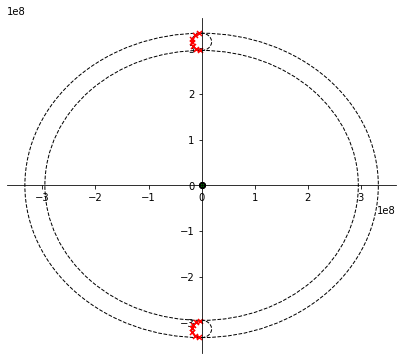

In [8]:
z7,p7,k7 =signal.butter(7,2*np.pi*np.array([47.0,53.0])*1e6,btype='bandpass',analog=True,output='zpk')
polen_nullen(z7,p7,[[47e6,47e6,0],[53e6,53e6,0],[3e6,3e6,50e6],[3e6,3e6,-50e6]]);

<figcaption>Polen van een 7de orde Butterworth banddoorlaatfilter met beperkte bandbreedte</figcaption>


We merken op dat voor de heel nauwe banddoorlaat filters de polen wel op een cirkel liggen waarvan de straal overeenkomt met de bandbreedte van de filter. Het is ook zo dat het verschil tussen deze banddoorlaatfilter en een laagdoorlaatfilter gevolgd door een hoogdoorlaatfilter nu wel enorm groot is. Dat zien we al op basis van de polen hierboven en ook op basis van de transferkarakteristieken hieronder.

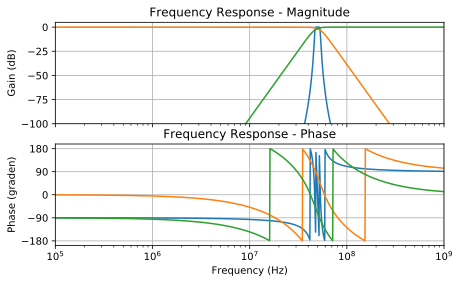

In [20]:
bl7,al7 = signal.butter(7,2*np.pi*53e6,analog=True);
bh7,ah7 = signal.butter(7,2*np.pi*47e6,btype='highpass',analog=True);
freqs_resp([[bc2,ac2],[bl7,al7],[bh7,ah7]],5,9,Printcoef=False);

<figcaption>Vergelijking tussen 7de orde Butterworth banddoorlaatfilter (met beperkte bandbreedte) en een opeenvolging van laagdoorlaatfilter en een hoogdoorlaatfilter</figcaption>

# Chebyshev filters


##  Chebyshev 40 MHz laagdoorlaatfilter van de 3de orde met 6dB maximale ripple

Veelterm coefficienten teller: M= 0
b[ 0 ] = 2.298652790795694e+24
Veelterm coefficienten noemer: N= 3
a[ 3 ] = 1.0
a[ 2 ] = 92822184.81844565
a[ 1 ] = 5.168208012246375e+16
a[ 0 ] = 2.2986527907956946e+24


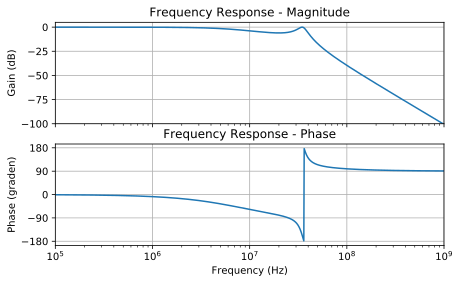

In [21]:
b3,a3 = signal.cheby1(N=3,rp=6,Wn=2*np.pi*40e6,analog=True)
freqs_resp([[b3,a3]],5,9);

<figcaption> 40 MHz Chebyshev laagdoorlaatfilter van de derde orde met een 6dB passband</figcaption>

Aangezien de doorlaatband 6 dB is, is het interessant hierop eens in detail in te zoemen. Dit doen we aan de hand van de onderstaande figuur.

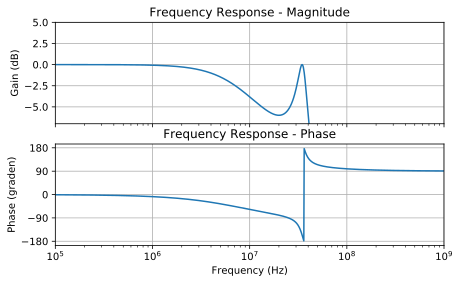

In [23]:
freqs_resp([[b3,a3]],5,9,lowDB=-7,Printcoef=False);

<figcaption>detail van de 6dB passband van een 40 MHz Chebyshev laagdoorlaatfilter van de derde orde</figcaption>

Bij een Chebyshev filter liggen de polen niet meer op een cirkel maar wel op een ellips. De onderstaande figuur geeft de ligging van deze polen aan.

Lijst der nullen: M= 0
Lijst der polen: N= 3
p[ 1 ] = (-23205546.204611413+221335928.5095666j)
p[ 2 ] = (-46411092.40922282-0j)
p[ 3 ] = (-23205546.204611413-221335928.5095666j)


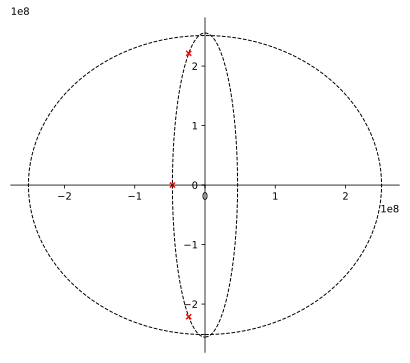

In [20]:
delta=6
z3,p3,k3 = signal.cheby1(N=3,rp=delta,Wn=2*np.pi*40e6,analog=True,output='zpk')
eps=np.sqrt(10**(0.1*delta)-1)
polen_nullen(z3,p3,[[40e6,40e6,0],[40e6*np.sinh(np.arcsinh(1/eps)/3),40e6*np.cosh(np.arcsinh(1/eps)/3),0]]);

<figcaption>ligging van de polen 40 MHz Chebyshev laagdoorlaatfilter van de derde orde met een 6dB passband</figcaption>



##  Chebyshev 120 MHz laagdoorlaatfilter van de 8de orde met 2dB maximale ripple

Veelterm coefficienten teller: M= 0
b[ 0 ] = 1.0669416336250132e+69
Veelterm coefficienten noemer: N= 8
a[ 8 ] = 1.0
a[ 7 ] = 524820305.9616953
a[ 6 ] = 1.2746966037803576e+18
a[ 5 ] = 5.1937707944741785e+26
a[ 4 ] = 5.104888759746549e+35
a[ 3 ] = 1.45769782715832e+44
a[ 2 ] = 6.590270478283454e+52
a[ 1 ] = 1.0103634193419598e+61
a[ 0 ] = 1.3431999354717115e+69


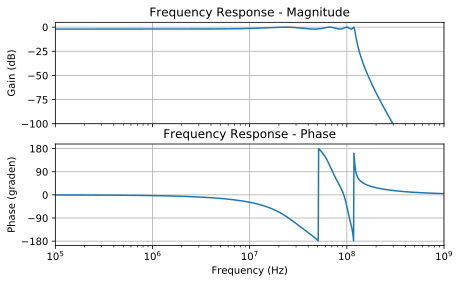

In [3]:
b8,a8 = signal.cheby1(N=8,rp=2,Wn=2*np.pi*120e6,analog=True)
freqs_resp([[b8,a8]],5,9);

<figcaption> 120 MHz Chebyshev laagdoorlaatfilter van de 8ste orde met een 2dB passband</figcaption>

Ook voor de 8ste orde gaan we inzoemen op de doorlaatband. Hier vinden we dan ook een rimpel van 2 dB met 8 extremen terug.

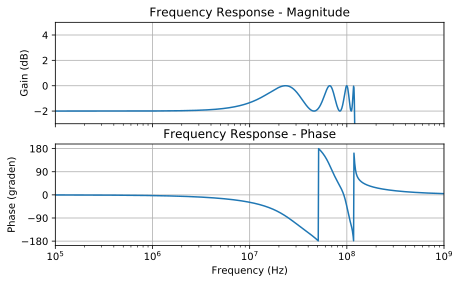

In [33]:
freqs_resp([[b8,a8]],5,9,lowDB=-3,Printcoef=False);

<figcaption>detail van de 2dB passband van de 120 MHz Chebyshev laagdoorlaatfilter van de 8ste orde</figcaption>

Lijst der nullen: M= 0
Lijst der polen: N= 8
p[ 1 ] = (-19974783.518686887+746281824.2305412j)
p[ 2 ] = (-56883370.83720408+632667181.5530242j)
p[ 3 ] = (-85131980.59479763+422734695.6263414j)
p[ 4 ] = (-100420018.03015907+148444684.39010677j)
p[ 5 ] = (-100420018.03015907-148444684.39010677j)
p[ 6 ] = (-85131980.59479763-422734695.6263414j)
p[ 7 ] = (-56883370.83720408-632667181.5530242j)
p[ 8 ] = (-19974783.518686887-746281824.2305412j)


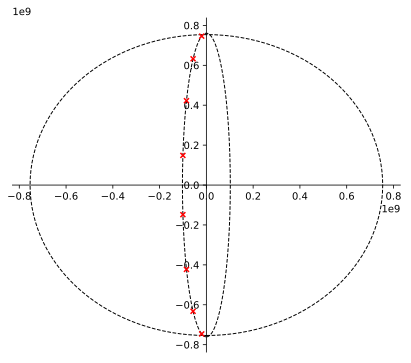

In [32]:
delta=2
z8,p8,k8 = signal.cheby1(N=8,rp=delta,Wn=2*np.pi*120e6,analog=True,output='zpk')
eps=np.sqrt(10**(0.1*delta)-1)
polen_nullen(z8,p8,[[120e6,120e6,0],[120e6*np.sinh(np.arcsinh(1/eps)/8),120e6*np.cosh(np.arcsinh(1/eps)/8),0]]);

<figcaption>ligging van de polen 120 MHz Chebyshev laagdoorlaatfilter van de 8ste orde met een 2dB passband</figcaption>

Wanneer we de Butterworth met Chebychev vergelijken merken we dat hoe meer passband we toelaten, hoe stijler flank is aan het einde van de doorlaatband. Dit is dan ook het belangrijke ontwerpcompromis.

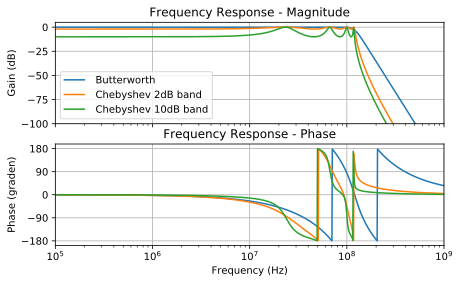

In [10]:
bb8,aa8 = signal.butter(8,2*np.pi*120e6,analog=True)
bc8,ac8 = signal.cheby1(N=8,rp=10,Wn=2*np.pi*120e6,analog=True)
freqs_resp([[bb8,aa8],[b8,a8],[bc8,ac8]],5,9,legend=[r"Butterworth",r"Chebyshev 2dB band",r"Chebyshev 10dB band"],Printcoef=False);

<figcaption>vergelijking Butterworth en Chebyshev laagdoorlaatfilters van de 8ste orde</figcaption>

##  Chebyshev 30 MHz laagdoorlaatfilter van de 2de orde met 6dB maximale ripple

Veelterm coefficienten teller: M= 0
b[ 0 ] = 1.780752121671573e+16
Veelterm coefficienten noemer: N= 2
a[ 2 ] = 1.0
a[ 1 ] = 121560720.41014235
a[ 0 ] = 2.5153792295277244e+16


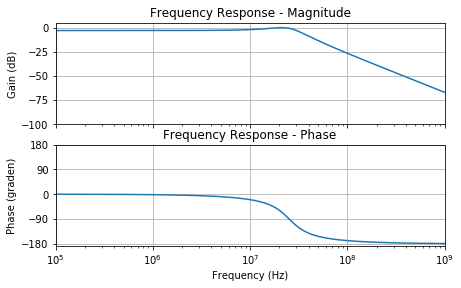

In [27]:
b2,a2 = signal.cheby1(N=2,rp=3,Wn=2*np.pi*30e6,analog=True)
freqs_resp([[b2,a2]],5,9,SaveGraf=True)

Lijst der nullen: M= 0
Lijst der polen: N= 2
p[ 1 ] = (-60780360.20507117+146490750.93199244j)
p[ 2 ] = (-60780360.20507117-146490750.93199244j)


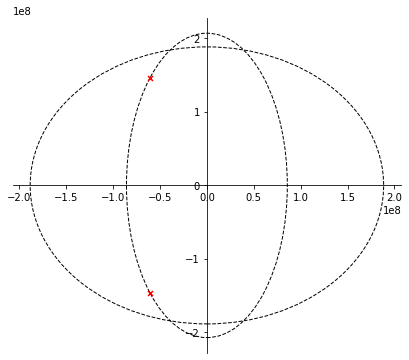

In [26]:
p2,n2,k2 = signal.cheby1(N=2,rp=3,Wn=2*np.pi*30e6,analog=True,output='zpk')
polen_nullen(p2,n2,[[30e6,30e6,0],[30e6*np.sinh(np.arcsinh(1)/2),30e6*np.cosh(np.arcsinh(1)/2),0]]);

In [33]:
import cmath 
cmath.polar(-60780360.20507117+146490750.93199244j)

(158599471.2957053, 1.9640890258650696)

In [29]:
np.abs(-60780360.20507117+146490750.93199244j)/np.pi/2

25241889.828472663

In [35]:
cmath.polar(-60780360.20507117+146490750.93199244j)[1]/np.pi*180

112.53401177002968

In [36]:
cmath.polar(60780360.20507117+146490750.93199244j)[1]/np.pi*180

67.46598822997034

In [37]:
2-2*np.cos(cmath.polar(60780360.20507117+146490750.93199244j)[1])

1.23353640830558

# Bessel Thomson filters

Veelterm coefficienten teller: M= 2
b[ 2 ] = 1.0000000000000004
b[ 1 ] = 0.0
b[ 0 ] = 0.0
Veelterm coefficienten noemer: N= 2
a[ 2 ] = 1.0
a[ 1 ] = 10882.796185405308
a[ 0 ] = 39478417.60435744


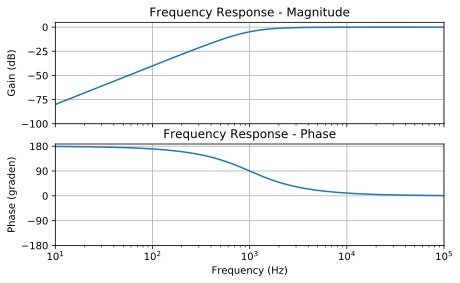

In [13]:
bt2,at2 = signal.bessel(2,2*np.pi*1e3,btype="highpass", analog=True)
freqs_resp([[bt2,at2]],1,5)

### Analyze van deze coëfficiënten

$a_0 = 1$  

$a_1 = \frac{\omega_c}{Q}$   met $ Q = 0.57735$

$a_2 = \omega_c^2$  